In [1]:
%matplotlib inline
%config InlineBAckend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle'))
plt.rcParams['axes.edgecolor'] = 'w'

In [6]:
from pandas_datareader import data, wb
import scipy.stats as st
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
import statsmodels.api as smapi
import datetime

In [8]:
def despine(axs):
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))
        

In [10]:
def is_stationary(df, maxlag=14, autolag=None, regression='ct'):
    """Run the Augmented Dickey-Fuller test from statsmodels
    and print output
    """
    outpt = stt.adfuller(df, maxlag=maxlag, autolag=autolog,
                        regression=regression)
    print('adf\t\t {0:.3f}'.format(output[0]))
    print('p\t\t {0:.3g}'.format(output[1]))
    print('crit. val.\t 1%: {0:.3f}, \
    5%: {1:.3f}, 10%: {2:.3f}'.format(output[4]["1%"], output[4]["5%"], output[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
                                    [output[0]>output[4]['5%']]))
    return outpt

In [11]:
%more data/mean-daily-temperature-fisher-river.csv

In [17]:
dateparse = lambda d:pd.datetime.strptime(d, '%Y-%m-%d')

In [18]:
temp = pd.read_csv('data/mean-daily-temperature-fisher-river.csv',
                  parse_dates=['Date'],
                  index_col = 'Date',
                  date_parser=dateparse)

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [19]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 1988-01-01 to 1991-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    1461 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [20]:
temp.head()

,Temp
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


In [21]:
temp = temp.iloc[:,0]

In [22]:
temp.head()

Date
1988-01-01   -23.0
1988-01-02   -20.5
1988-01-03   -22.0
1988-01-04   -30.5
1988-01-05   -31.0
Name: Temp, dtype: float64

In [23]:
temp.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [24]:
temp.dtypes

dtype('float64')

Text(0,0.5,'Temperature')

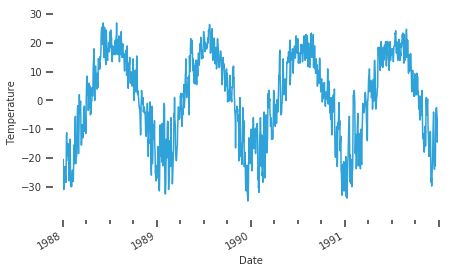

In [25]:
temp.plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')

In [26]:
temp.describe()

count    1461.000000
mean        0.803320
std        15.154634
min       -35.000000
25%       -11.250000
50%         2.000000
75%        14.500000
max        27.000000
Name: Temp, dtype: float64

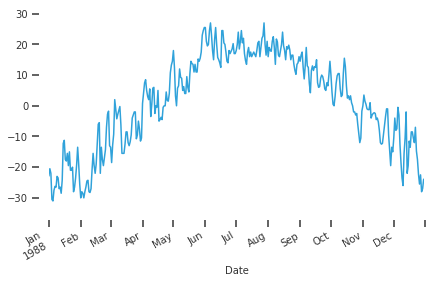

In [27]:
temp['1988'].plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.minorticks_off()

Text(0,0.5,'Temperature')

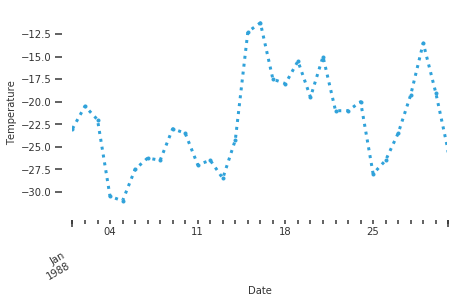

In [28]:
temp['1988-01'].plot(ls='dotted', marker='.')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')

In [29]:
temp[temp < -25].head()

Date
1988-01-04   -30.50
1988-01-05   -31.00
1988-01-06   -27.50
1988-01-07   -26.25
1988-01-08   -26.50
Name: Temp, dtype: float64

In [31]:
temp['1988'].index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1988-12-22', '1988-12-23', '1988-12-24', '1988-12-25',
               '1988-12-26', '1988-12-27', '1988-12-28', '1988-12-29',
               '1988-12-30', '1988-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

Text(0.5,1,'Fisher River Mean Temperature')

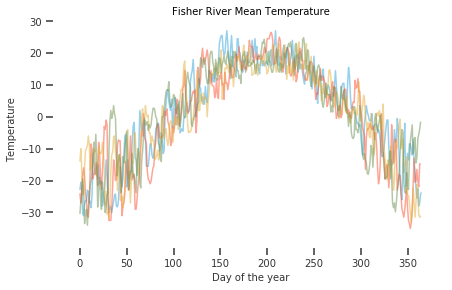

In [32]:
kws = dict(lw=1.5, alpha=0.5)
plt.plot(temp['1988'].values, **kws)
plt.plot(temp['1989'].values, **kws)
plt.plot(temp['1990'].values, **kws)
plt.plot(temp['1991'].values, **kws)
despine(plt.gca())
plt.xlabel('Day of the year')
plt.ylabel('Temperature')
plt.title('Fisher River Mean Temperature')

In [37]:
temp.resample('A')

In [38]:
pd.__version__

'1.0.1'

ValueError: zero-size array to reduction operation fmin which has no identity

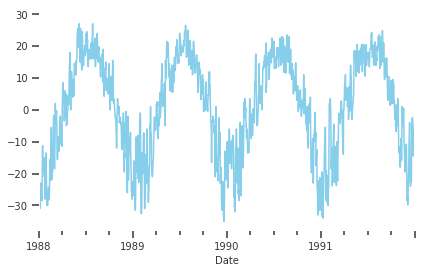

In [41]:
temp.plot(lw=1.5, color='SkyBlue')
temp.resample('W').plot(lw=1, color='Green')
temp.resample('AS', loffset='178 D').plot(color='k')
plt.ylim(-50, 30)
plt.ylabel('Temperature')
plt.title('Fisher River Mean Temperature')
plt.legend(['Raw', 'Binned Weekly', 'Binned Yearly'], loc=3)
despine(plt.gca())

ValueError: zero-size array to reduction operation fmin which has no identity

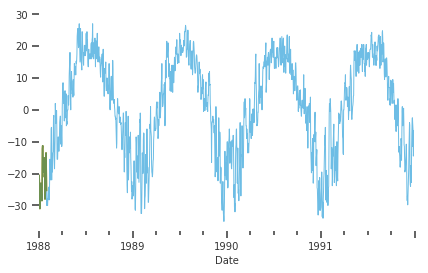

In [42]:
temp.plot(lw=1, alpha=0.7)
temp.resample('M').plot(lw=1.5, zorder=32)
temp.resample('6M').plot(lw=1.5, dashes=(5,2), 
                         zorder=32, color='Green')
plt.gcf().autofmt_xdate()
despine(plt.gca())
plt.ylim(-50,30)
plt.ylabel('Temperature')
plt.title('Fisher River Temperature')
plt.legend(['Raw', 'Binned 6 Months ', 'Binned 30 Days'], loc=3);

AttributeError: module 'pandas' has no attribute 'rolling_mean'

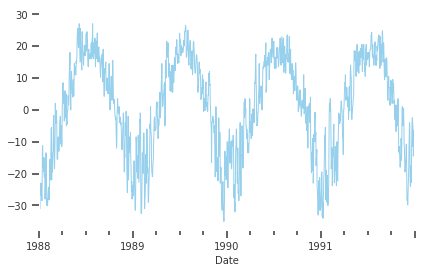

In [43]:
temp.plot(lw=1, alpha=0.5)
pd.rolling_mean(temp, center=True, window=60).plot(color='Green')
plt.fill_between(temp.resample('M', label='left', 
                               loffset='15 D').index,
                 y1=temp.resample('M', how='max').values,
                 y2=temp.resample('M', how='min').values,
                 color='0.85',
                 )
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')
despine(plt.gca())
plt.title('Fisher River Temperature');

In [44]:
pd.rolling_cov(temp, center=True, window=10).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

AttributeError: module 'pandas' has no attribute 'rolling_cov'

In [45]:
pd.rolling_var(temp, center=True, window=14).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

AttributeError: module 'pandas' has no attribute 'rolling_var'

In [46]:
temp.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [47]:
temp_residual = temp-pd.rolling_mean(temp, center=True, window=60)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [48]:
temp_residual.plot(lw=1.5, color='Coral')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.title('Residuals')
plt.ylabel('Temperature');

NameError: name 'temp_residual' is not defined

In [49]:
pd.rolling_var(temp_residual, center=True, window=14).plot(color='Green',
                                                 lw=1.5)
despine(plt.gca());

AttributeError: module 'pandas' has no attribute 'rolling_var'

In [50]:
def is_stationary(df, maxlag=14, autolag=None, regression='ct'):
    """Run the Augmented Dickey-Fuller test from statsmodels
    and print output.
    """
    outpt = stt.adfuller(df,maxlag=maxlag, autolag=autolag,
                            regression=regression)
    print('adf\t\t {0:.3f}'.format(outpt[0]))
    print('p\t\t {0:.3g}'.format(outpt[1]))
    print('crit. val.\t 1%: {0:.3f}, \
5%: {1:.3f}, 10%: {2:.3f}'.format(outpt[4]["1%"], 
                                     outpt[4]["5%"], outpt[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
                                   [outpt[0]>outpt[4]['5%']]))
    return outpt

In [51]:
%more data/monthly-car-sales-in-quebec-1960.csv

In [52]:
carsales = pd.read_csv('data/monthly-car-sales-in-quebec-1960.csv',
                      parse_dates=['Month'],
                      index_col='Month',
                      date_parser=lambda d:pd.datetime.strptime(d, '%Y-%m'))

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  after removing the cwd from sys.path.


In [53]:
carsales.head()

,Monthly car sales in Quebec 1960-1968
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [54]:
carsales = carsales.iloc[:,0]

In [55]:
 carsales.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq=None)

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

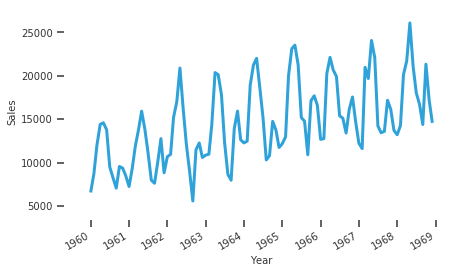

In [56]:
plt.plot(carsales)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xlim('1960', '1969')
plt.title('Monthly Car sales')

In [57]:
is_stationary(carsales)

adf		 -1.673
p		 0.763
crit. val.	 1%: -4.060, 5%: -3.459, 10%: -3.155
stationary?	 false


/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-1.6729256654812248,
 0.7625906462498004,
 14,
 93,
 {'1%': -4.059568800656923,
  '5%': -3.4587997574833063,
  '10%': -3.1553337836930617})

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
carsales_decomp = seasonal_decompose(carsales, freq=12)

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


In [59]:
carsales_trend = carsales_decomp.trend
carsales_seasonal = carsales_decomp.seasonal
carsales_residual = carsales_decomp.resid

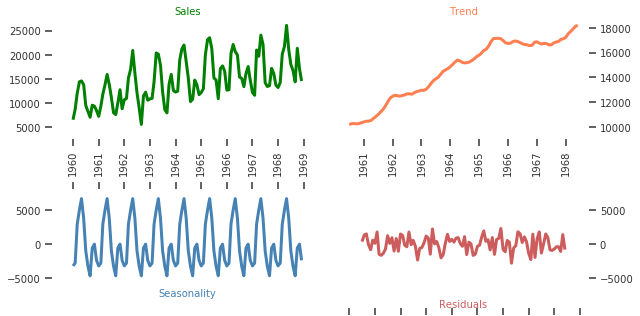

In [61]:
def change_plot(ax):
    despine(ax)
    ax.locator_params(axis='y', nbins=5)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
plt.figure(figsize=(9, 4.5))
plt.subplot(221)
plt.plot(carsales, color='Green')
change_plot(plt.gca())
plt.title('Sales', color='Green')
xl = plt.xlim()
yl = plt.ylim()

plt.subplot(222)
plt.plot(carsales.index, carsales_trend, color='Coral')
change_plot(plt.gca())
plt.title('Trend', color='Coral')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xlim()
plt.ylim()

plt.subplot(223)
plt.plot(carsales.index, carsales_seasonal, color='SteelBlue')
change_plot(plt.gca())
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20)
plt.xlim()
plt.ylim(-8000, 8000)

plt.subplot(224)
plt.plot(carsales.index, carsales_residual, color='IndianRed')
change_plot(plt.gca())
plt.xlim(xl)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.ylim(-8000, 8000)
plt.xlabel('Residuals', color='IndianRed', labelpad=-20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.55)

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


[None, None, None, None, None, None, None, None, None, None, None, None]

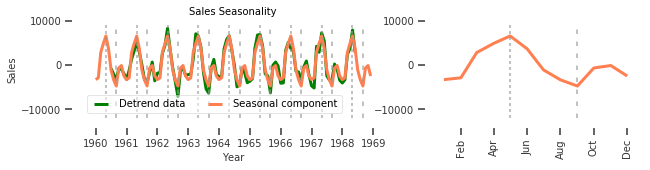

In [63]:
fig = plt.figure(figsize=(7, 1.5))
ax1 = fig.add_axes([0.1, 0.1, 0.6, 0.9])
ax1.plot(carsales-carsales_trend, color='Green', label='Detrend data')
ax1.plot(carsales_seasonal, color='Coral', label='Seasonal component')
kwrds = dict(lw=1.5, color='0.6', alpha=0.8)
d1 = pd.datetime(1960, 9, 1)
dd = pd.Timedelta('365 Days')
[ax1.axvline(d1+dd*i, dashes=(3, 5), **kwrds) for i in range(9)]
d2 = pd.datetime(1960, 5, 1)
[ax1.axvline(d2+dd*i, dashes=(2,2), **kwrds) for i in range(9)]
ax1.set_ylim(-12000, 10000)

ax1.locator_params(axis='y', nbins=4)
ax1.set_xlabel('Year')
ax1.set_title('Sales Seasonality')
ax1.set_ylabel('Sales')
ax1.legend(loc=0, ncol=2, frameon=True)

ax2 = fig.add_axes([0.8, 0.1, 0.4, 0.9])
ax2.plot(carsales_seasonal['1960':'1960'], color='Coral', label='Seasonal component')
ax2.set_ylim(-12000, 10000)
[ax2.axvline(d1+dd*i, dashes=(3,5), **kwrds) for i in range(1)]
d2 = pd.datetime(1960, 5, 1)
[ax2.axvline(d2+dd*i, dashes=(2,2), **kwrds) for i in range(1)]
despine([ax1, ax2])
import matplotlib.dates as mlpdates
yrsfmt = mlpdates.DateFormatter('%b')
ax2.xaxis.set_major_formatter(yrsfmt)
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=90)

In [64]:
carsales_seasonal_component = carsales_seasonal['1960'].values

In [65]:
carsales_residual.dropna(inplace=True)

In [66]:
is_stationary(carsales_residual)

adf		 -4.025
p		 0.00811
crit. val.	 1%: -4.075, 5%: -3.466, 10%: -3.160
stationary?	 true


/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-4.0246991208169085,
 0.008108426830324257,
 14,
 81,
 {'1%': -4.075121979053178,
  '5%': -3.4661550774027594,
  '10%': -3.1596113315495042})

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Counts')

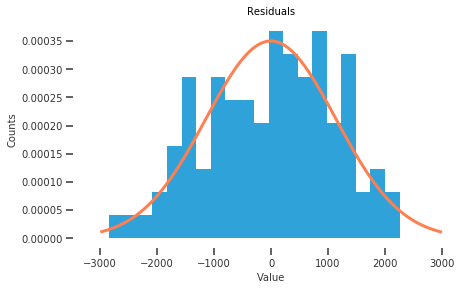

In [67]:
loc, shape = st.norm.fit(carsales_residual)
x = range(-3000, 3000)
y = st.norm.pdf(x, loc, shape)
n, bins, patches = plt.hist(carsales_residual, bins=20, normed=True)
plt.plot(x,y,color='Coral')
despine(plt.gca())
plt.title('Residuals')
plt.xlabel('Value')
plt.ylabel('Counts')

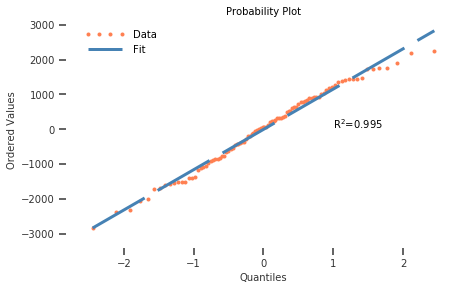

In [71]:
(osm, osr), (slope, intercept, r) = st.probplot(carsales_residual, dist='norm', fit=True)
line_func = lambda x: slope*x + intercept
plt.plot(osm, osr, '.', label='Data', color='Coral')
plt.plot(osm, line_func(osm), color='SteelBlue', dashes=(20, 5), label='Fit')
plt.xlabel('Quantiles')
plt.ylabel('Ordered Values')
despine(plt.gca())
plt.text(1, 14, 'R$^2$={0:.3f}'.format(r))
plt.title('Probability Plot')
plt.legend(loc='best', numpoints=4, handlelength=4)

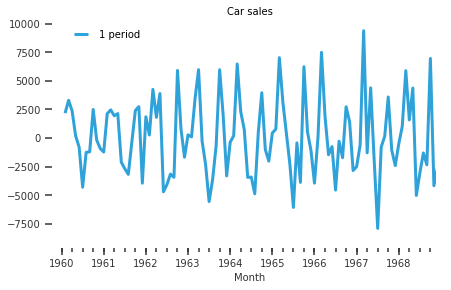

In [73]:
carsales.diff(1).plot(label='1 period', title='Car sales')
plt.legend(loc='best')
despine(plt.gca())

In [74]:
is_stationary(carsales.diff(1).dropna())

adf		 -3.124
p		 0.101
crit. val.	 1%: -4.061, 5%: -3.459, 10%: -3.156
stationary?	 false


/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-3.124402746704733,
 0.10054428111196306,
 14,
 92,
 {'1%': -4.060704239900962,
  '5%': -3.4593375892783755,
  '10%': -3.1556468172104877})

Text(0.5,0,'Date')

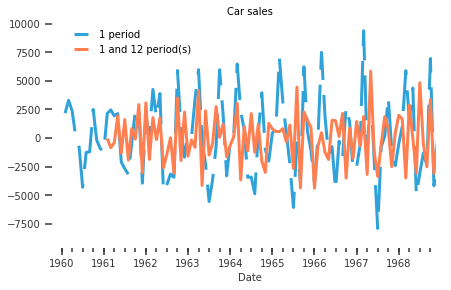

In [75]:
carsales.diff(1).plot(label='1 period', title='Car sales', dashes=(15,5))
carsales.diff(1).diff(12).plot(label='1 and 12 period(s)', color='Coral')
plt.legend(loc='best')
despine(plt.gca())
plt.xlabel('Date')

In [76]:
is_stationary(carsales.diff(1).diff(12).dropna())

adf		 -3.875
p		 0.0131
crit. val.	 1%: -4.077, 5%: -3.467, 10%: -3.160
stationary?	 true


/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-3.8749901347271845,
 0.013127951995743745,
 14,
 80,
 {'1%': -4.076637646484375,
  '5%': -3.4668704960937498,
  '10%': -3.1600269921875})

In [77]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
is_stationary((carsales-carsales_seasonal).diff(1).dropna())

adf		 -3.611
p		 0.0289
crit. val.	 1%: -4.061, 5%: -3.459, 10%: -3.156
stationary?	 true


/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-3.6110106895691247,
 0.028927752222745417,
 14,
 92,
 {'1%': -4.060704239900962,
  '5%': -3.4593375892783755,
  '10%': -3.1556468172104877})

In [79]:
ts = carsales_seasonal
tsdiff = ts.diff(1)

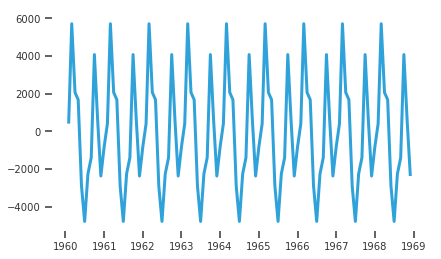

In [80]:
plt.plot(tsdiff)

In [81]:
model = ARIMA(ts, order=(1,1,0))
arres = model.fit()

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency

2001.858831738842 2009.8773182422276


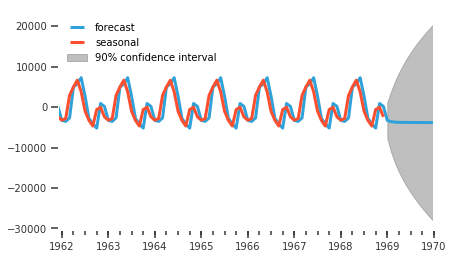

In [82]:
arres.plot_predict(start='1961-12-01', end='1970-01-01', alpha=0.10)
plt.legend(loc='upper left')
print(arres.aic, arres.bic)

In [83]:
tsa.stattools.arma_order_select_ic(tsdiff.dropna(), max_ar=2, max_ma=2, ic='aic')

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting

{'aic':              0            1            2
 0  2015.342228  1998.729968  1981.815554
 1  2001.858832  2000.174386  1953.803858
 2  1990.818519  1948.765359  1947.092269, 'aic_min_order': (2, 2)}

In [84]:
acf = stt.acf(tsdiff.dropna(), nlags=10)
pacf = stt.acf(tsdiff.dropna(), nlags=10)

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


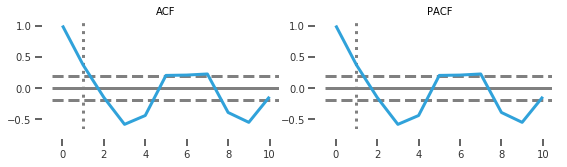

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
ax1.axhline(y=0, color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
ax1.axvline(x=1, ls=':',  color='gray')
ax1.plot(acf)
ax1.set_title('ACF')
ax2.axhline(y=0, color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
ax2.axvline(x=1, ls=':', color='gray')
ax2.plot(pacf)
ax2.set_title('PACF')
despine([ax1, ax2])

In [86]:
model = ARIMA(ts, order=(1,0,1))
arimares = model.fit()

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [ ]:
arimares.plot_predict(start='1961-12-01', end='1970-01-01', alpha=0.10)
plt.legend(loc='upper ')